# Problem Set #2 - Part 1

MACS 30000, Dr. Evans

Haihao Guo

## Numerical differentiation exercises

### Problem 1

In [12]:
import sympy as sy
import numpy as np
import math
from sympy import *
from matplotlib import pyplot as plt

problem 1 answer: 
(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

problem 1 plot: 


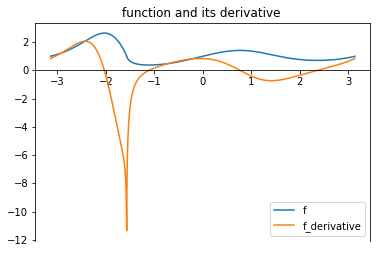

In [52]:
x = sy.symbols('x')
y = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
answer = lambda x: sy.diff(y, x)
print('problem 1 answer: ')
print(str(answer(x)))

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.set_title('function and its derivative ')

f = sy.lambdify(x, y, 'numpy')

def f_derivative(a): 
    def symbols():
        x = sy.symbols('x')
        f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x))) 
        f_prime = sy.diff(f, x)
        return sy.lambdify(x, f_prime)
    return symbols()(a)

x_domain = np.linspace(-math.pi, math.pi, 1000)
ax.plot(x_domain, f(x_domain), label='f')
ax.plot(x_domain, f_derivative(x_domain), label='f_derivative')
print('')
print('problem 1 plot: ')
ax.legend()

### Problem 2

problem 2 plot: 


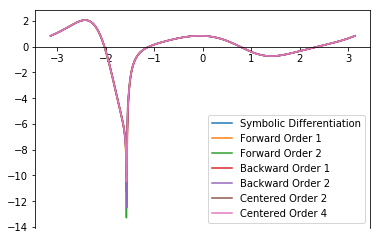

In [14]:
def forward_1(f, x, h=0.01):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h=0.01):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def backward_1(f, x, h=0.01):
    return (f(x) - f(x - h)) / h

def backward_2(f, x, h=0.01):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

def centered_2(f, x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)

def centered_4(f, x, h=0.01):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)


x_domain = np.linspace(-math.pi, math.pi, 1000)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

ax.plot(x_domain, f_derivative(x_domain), label='Symbolic Differentiation') 
ax.plot(x_domain, forward_1(f, x_domain), label='Forward Order 1') 
ax.plot(x_domain, forward_2(f, x_domain), label='Forward Order 2') 
ax.plot(x_domain, backward_1(f, x_domain), label='Backward Order 1') 
ax.plot(x_domain, backward_2(f, x_domain), label='Backward Order 2') 
ax.plot(x_domain, centered_2(f, x_domain), label='Centered Order 2') 
ax.plot(x_domain, centered_4(f, x_domain), label='Centered Order 4') 

print('problem 2 plot: ')
ax.legend()

### Problem 3

problem 3 plot: 


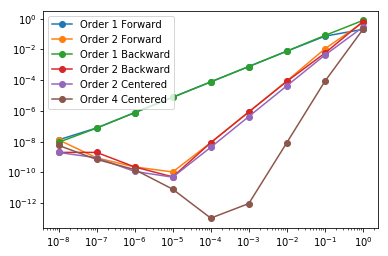

In [15]:
def absolute_error(func, x, h):
    return np.absolute(f_derivative(x) - func(f, x, h))

def compare_derivative(x0, h_list):
    fig, ax = plt.subplots()
    ax.loglog(h_list, absolute_error(forward_1, x0, h_list), marker='o', label = "Order 1 Forward")
    ax.loglog(h_list, absolute_error(forward_2, x0, h_list), marker='o', label = "Order 2 Forward")
    ax.loglog(h_list, absolute_error(backward_1, x0, h_list), marker='o', label = "Order 1 Backward")
    ax.loglog(h_list, absolute_error(backward_2, x0, h_list), marker='o', label = "Order 2 Backward")
    ax.loglog(h_list, absolute_error(centered_2, x0, h_list), marker='o', label = "Order 2 Centered")
    ax.loglog(h_list, absolute_error(centered_4, x0, h_list), marker='o', label = "Order 4 Centered")
    ax.legend(loc = "upper left")
    
x0 = 1
h_list = np.logspace(-8, 0 ,9)
print('problem 3 plot: ')
compare_derivative(x0, h_list)

### Problem 4

In [16]:
import pandas as pd

a = 500

df = pd.DataFrame(np.load('plane.npy'), columns=['t','alpha','beta'])
df['alpha'] = np.deg2rad(df['alpha'])
df['beta'] = np.deg2rad(df['beta'])


df['x'] = a * np.tan(df['beta']) / (np.tan(df['beta']) - np.tan(df['alpha']))
df['y'] = a * np.tan(df['beta']) * np.tan(df['alpha']) / (np.tan(df['beta']) - np.tan(df['alpha']))


df['x_derivative'] = np.zeros(8)
df['y_derivative'] = np.zeros(8)


df['x_derivative'][0] = df['x'][1] - df['x'][0]
df['y_derivative'][0] = df['y'][1] - df['y'][0]


df['x_derivative'][7] = df['x'][7] - df['x'][6]
df['y_derivative'][7] = df['y'][7] - df['y'][6]


for i in range(1, 7):
    df['x_derivative'][i] = (df['x'][i + 1] - df['x'][i - 1]) / 2
    df['y_derivative'][i] = (df['y'][i + 1] - df['y'][i - 1]) / 2
    
df['speed'] = np.sqrt(df['x_derivative'] ** 2 + df['y_derivative'] ** 2)


for i in range(8):
    print('The speed of plane is {} at time {}'.format(df['speed'][i], df['t'][i]))

The speed of plane is 46.42420062213374 at time 7.0
The speed of plane is 47.001039380953344 at time 8.0
The speed of plane is 48.99880514036797 at time 9.0
The speed of plane is 50.09944162965227 at time 10.0
The speed of plane is 48.290350838204944 at time 11.0
The speed of plane is 51.564559049272255 at time 12.0
The speed of plane is 53.923033545053535 at time 13.0
The speed of plane is 51.51480056963696 at time 14.0


### Problem 5

In [17]:
def J_matrix(f, x0, h):
    J = np.zeros((len(f),len(x0)))
    I = np.identity(len(x0))
    for i, fun in enumerate(f):
        for j, pt in enumerate(x0):
            func = lambdify((x, y), fun, 'numpy')
            xleft = pt - h * I[:,j]
            xright = pt + h * I[:,j]
            J[i, j] = (func(xright[0], xright[1]) - func(xleft[0], xleft[1])) / (2 * h)
    return J

#test case
x = sy.Symbol('x')
y = sy.Symbol('y')
f_ = [x**2, x**3-y]
x0 = [1, 1]
h = 1e-4
J_matrix(f_, x0 , h)

array([[ 2.        ,  0.        ],
       [ 3.00000001, -1.        ]])

### Problem 7

/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/haihaoguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/haihaoguo/anaconda3/lib/pytho

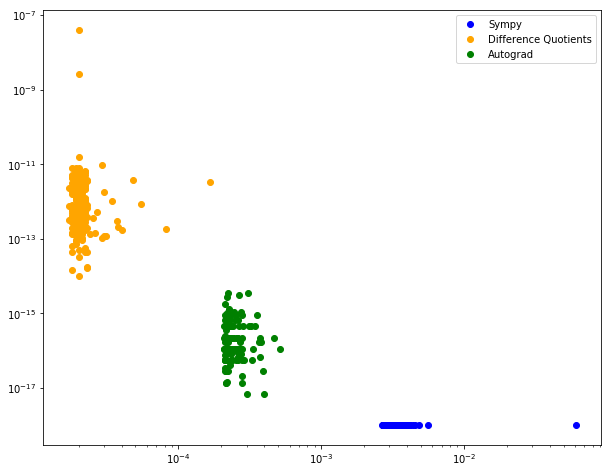

In [53]:
import time
from autograd import numpy as anp 
from autograd import grad

def Time(N): 
    Time1 = np.zeros(N,dtype='float')
    Time2 = np.zeros(N,dtype='float')
    Time3 = np.zeros(N,dtype='float')
    Error1 = 1e-18*np.ones(N,dtype='float')
    Error2 = np.zeros(N,dtype='float')
    Error3 = np.zeros(N,dtype='float')
    dg = grad(lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x))) )
    for i in range(N):
        xp = np.random.uniform(low=-np.pi, high=np.pi)
        
        time_begin_1 = time.clock()
        rv1 = f_derivative(xp)
        time_end_1 = time.clock()
        Time1[i] = time_end_1 - time_begin_1
        
        time_begin_2 = time.clock()
        rv2 = centered_4(f, xp, 0.0001)
        time_end_2 = time.clock()
        Time2[i] = time_end_2 - time_begin_2
        Error2[i] = abs(rv2 - rv1)
        
        time_begin_3 = time.clock()
        rv3 = dg(xp)
        time_end_3 = time.clock()
        Time3[i] = time_end_3-time_begin_3
        Error3[i] = abs(rv3 - rv1)
    
    ax = plt.figure(figsize=(10,8)).gca() 
    ax.loglog(Time1,Error1,'ro',label='Sympy',color='blue') 
    ax.loglog(Time2,Error2,'ro',label='Difference Quotients',color='orange') 
    ax.loglog(Time3,Error3,'ro',label='Autograd',color='green') 
    ax.legend()
    return

Time(200)